In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
logins = pd.read_json('logins.json')
data = pd.read_json('ultimate_data_challenge.json')

In [3]:
logins['login_time'] = pd.to_datetime(logins['login_time'], format='%d%b%Y:%H:%M:%S.%f') 

In [4]:
logins['quarter_hours'] = logins['login_time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))
data['city'] = data['city'].str.replace(r"[\"\',]", '')

In [5]:
logins['month'] = logins['quarter_hours'].dt.month
logins['day'] = logins['quarter_hours'].dt.day
logins['weekday'] = logins['quarter_hours'].dt.weekday
logins['hour'] = logins['quarter_hours'].dt.hour
logins['minute'] = logins['quarter_hours'].dt.minute
logins['time_only'] = logins['quarter_hours'].dt.time
logins['date_only'] = logins['quarter_hours'].dt.date
logins

,login_time,quarter_hours,month,day,weekday,hour,minute,time_only,date_only
0,1970-01-01 20:13:18,1970-01-01 20:00:00,1,1,3,20,0,20:00:00,1970-01-01
1,1970-01-01 20:16:10,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01
2,1970-01-01 20:16:37,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01
3,1970-01-01 20:16:36,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01
4,1970-01-01 20:26:21,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01
...,...,...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13
93138,1970-04-13 18:43:56,1970-04-13 18:30:00,4,13,0,18,30,18:30:00,1970-04-13
93139,1970-04-13 18:54:02,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13
93140,1970-04-13 18:57:38,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13


In [6]:
logins[logins.weekday == 2]

,login_time,quarter_hours,month,day,weekday,hour,minute,time_only,date_only
3367,1970-01-07 00:01:43,1970-01-07 00:00:00,1,7,2,0,0,00:00:00,1970-01-07
3368,1970-01-07 00:01:26,1970-01-07 00:00:00,1,7,2,0,0,00:00:00,1970-01-07
3369,1970-01-07 00:04:14,1970-01-07 00:00:00,1,7,2,0,0,00:00:00,1970-01-07
3372,1970-01-07 00:00:52,1970-01-07 00:00:00,1,7,2,0,0,00:00:00,1970-01-07
3373,1970-01-07 00:03:30,1970-01-07 00:00:00,1,7,2,0,0,00:00:00,1970-01-07
...,...,...,...,...,...,...,...,...,...
88159,1970-04-08 23:50:52,1970-04-08 23:45:00,4,8,2,23,45,23:45:00,1970-04-08
88161,1970-04-08 23:56:49,1970-04-08 23:45:00,4,8,2,23,45,23:45:00,1970-04-08
88162,1970-04-08 23:51:30,1970-04-08 23:45:00,4,8,2,23,45,23:45:00,1970-04-08
88167,1970-04-08 23:57:37,1970-04-08 23:45:00,4,8,2,23,45,23:45:00,1970-04-08


In [7]:
weekday_map = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
logins['weekday_name'] = logins['weekday'].map(weekday_map)

In [8]:
logins

,login_time,quarter_hours,month,day,weekday,hour,minute,time_only,date_only,weekday_name
0,1970-01-01 20:13:18,1970-01-01 20:00:00,1,1,3,20,0,20:00:00,1970-01-01,Thursday
1,1970-01-01 20:16:10,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01,Thursday
2,1970-01-01 20:16:37,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01,Thursday
3,1970-01-01 20:16:36,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01,Thursday
4,1970-01-01 20:26:21,1970-01-01 20:15:00,1,1,3,20,15,20:15:00,1970-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13,Monday
93138,1970-04-13 18:43:56,1970-04-13 18:30:00,4,13,0,18,30,18:30:00,1970-04-13,Monday
93139,1970-04-13 18:54:02,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13,Monday
93140,1970-04-13 18:57:38,1970-04-13 18:45:00,4,13,0,18,45,18:45:00,1970-04-13,Monday


<AxesSubplot:xlabel='weekday_name', ylabel='count'>

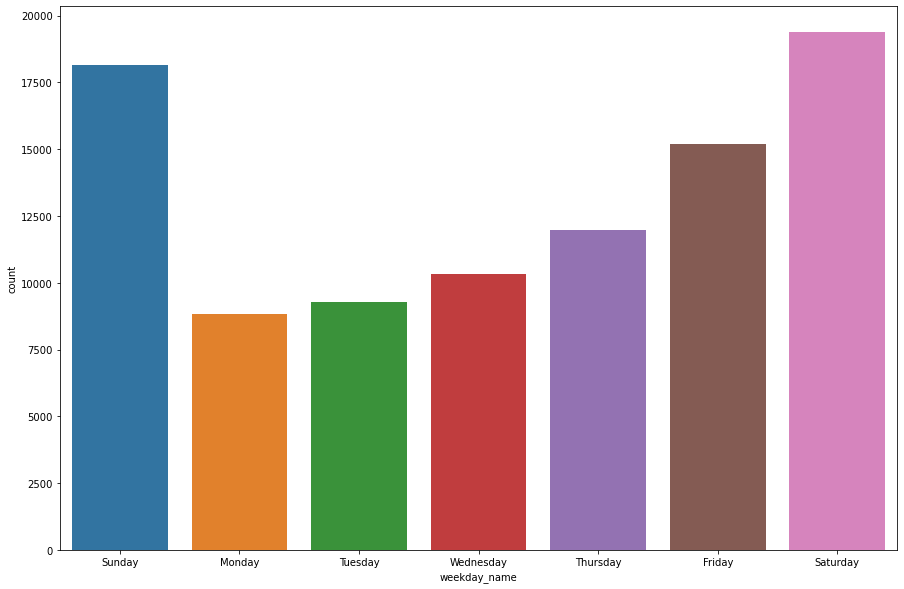

In [9]:

plt.figure(figsize=(15,10))

sns.countplot(x=logins.weekday_name, data=logins, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

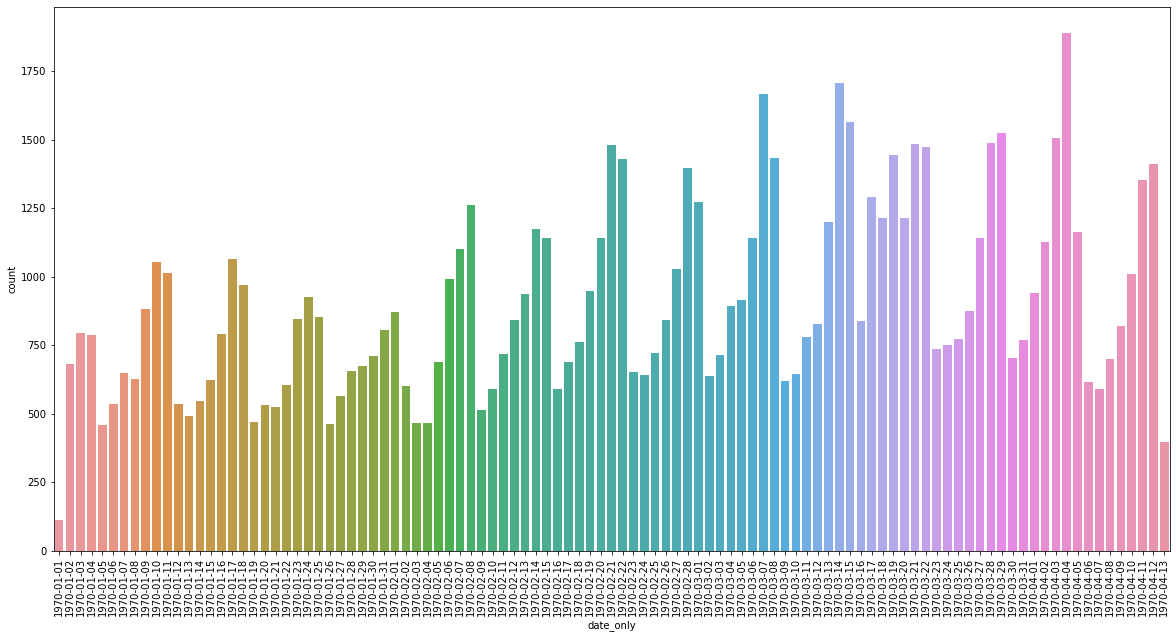

In [10]:

plt.figure(figsize=(20,10))

g = sns.countplot(x=logins.date_only, data=logins)
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='time'>

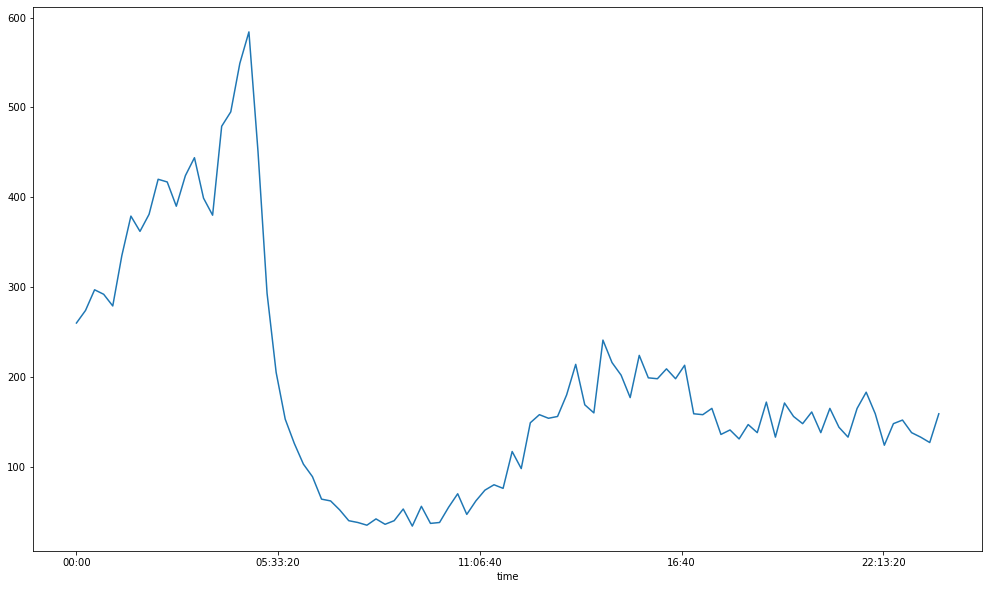

In [11]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Sunday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

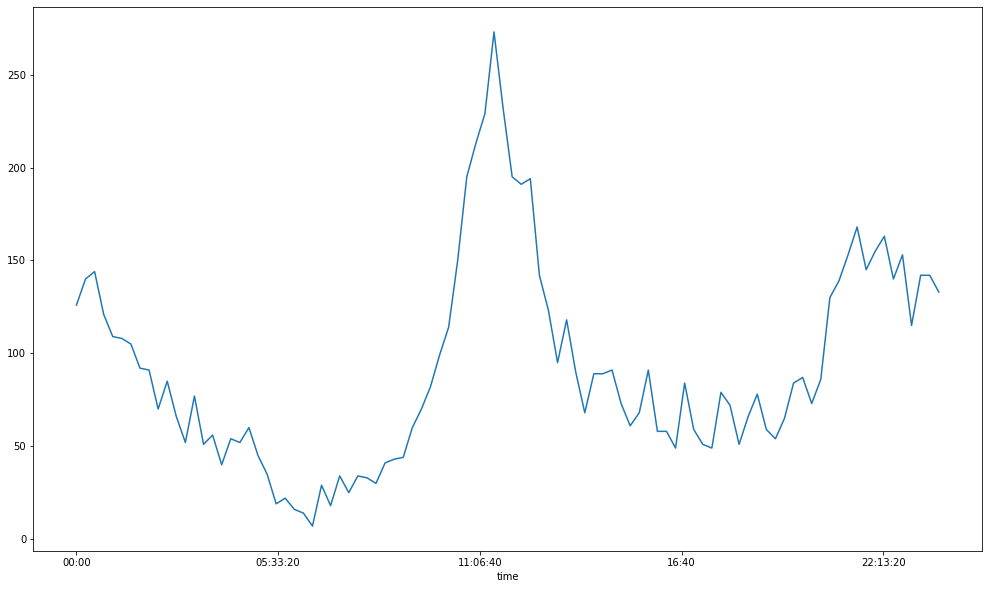

In [12]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Monday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

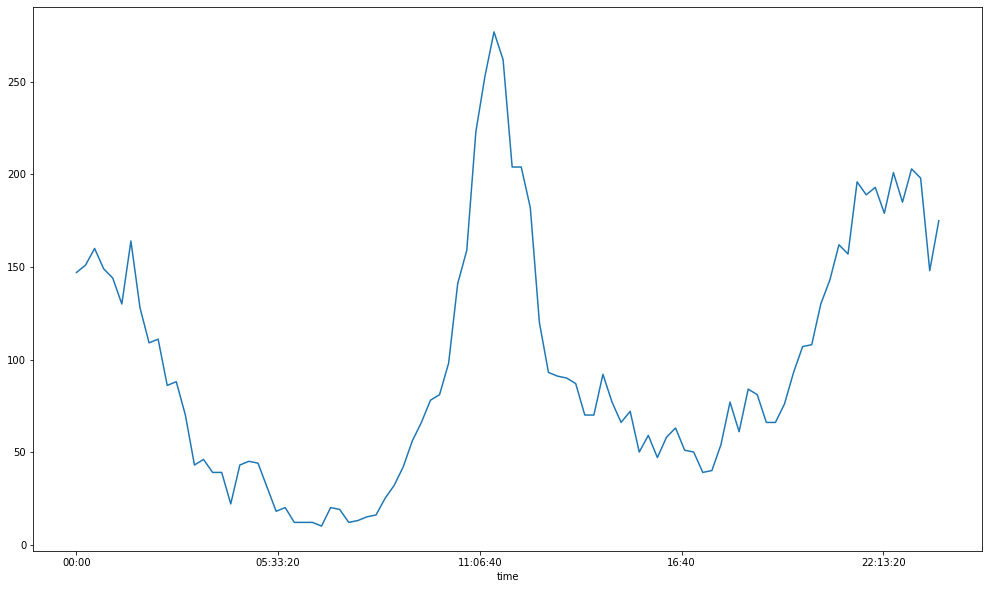

In [13]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Tuesday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

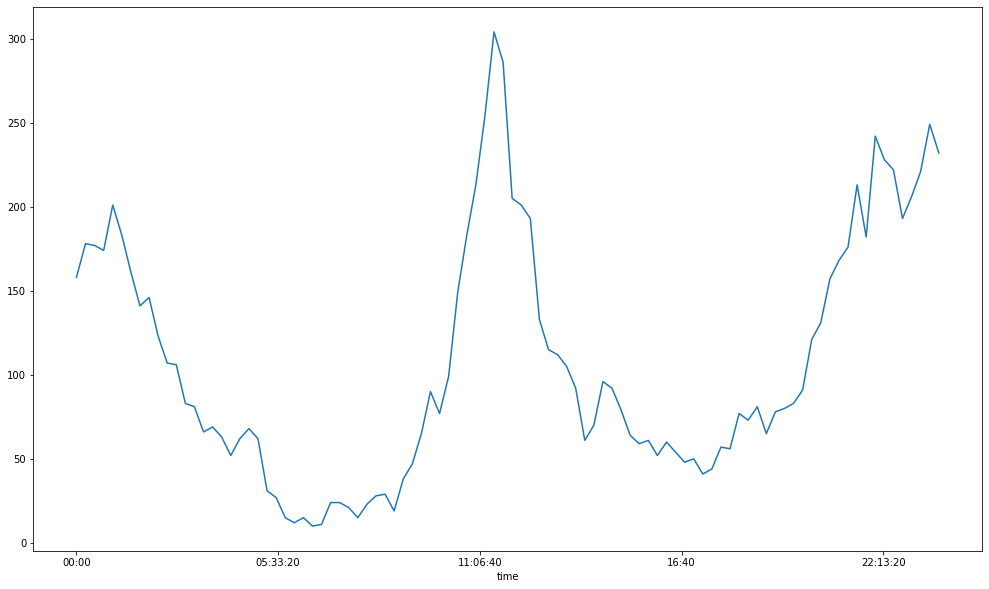

In [14]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Wednesday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

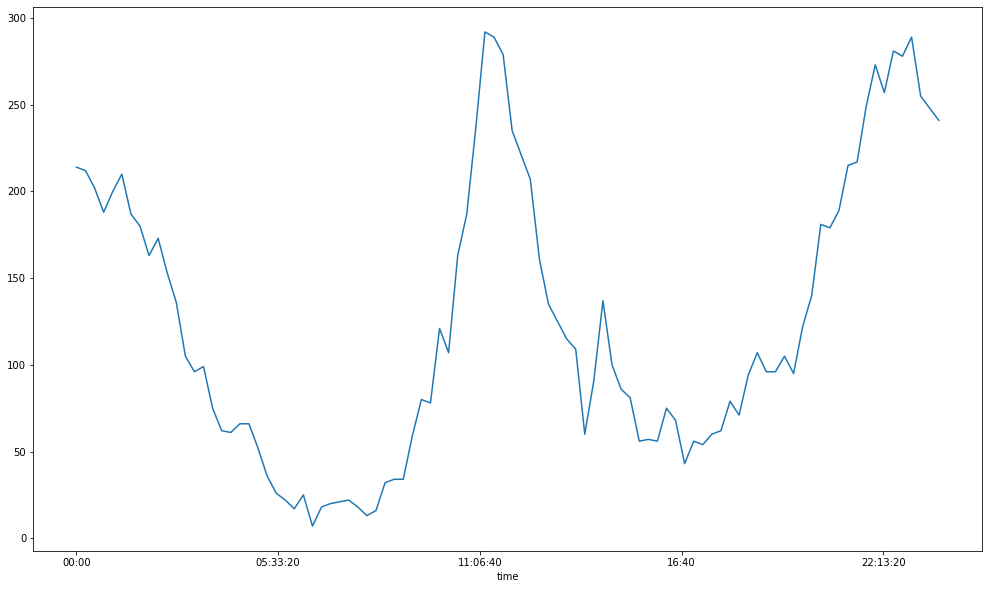

In [15]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Thursday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

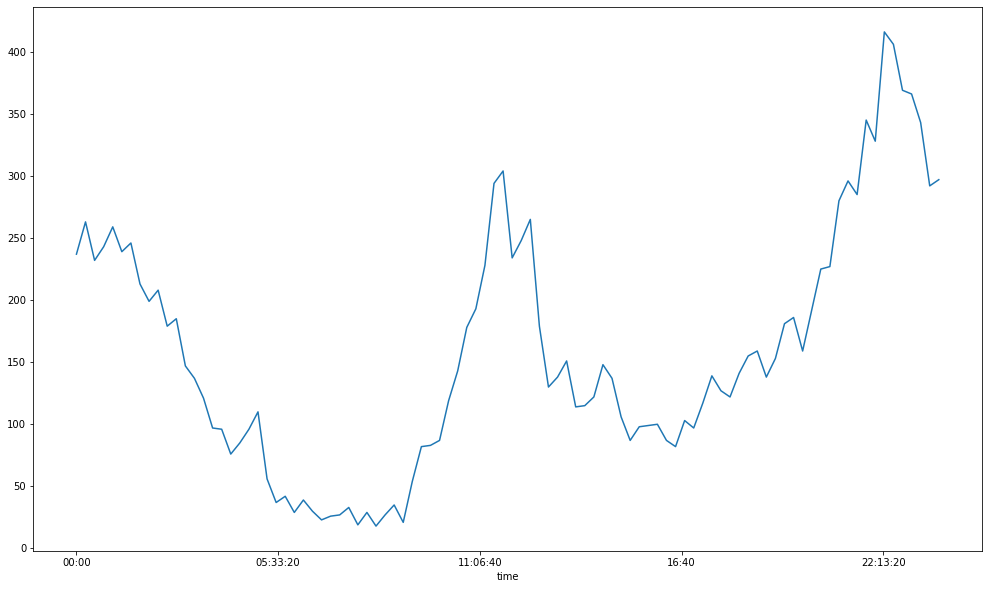

In [16]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Friday'].time_only.value_counts().plot(kind='line')

<AxesSubplot:xlabel='time'>

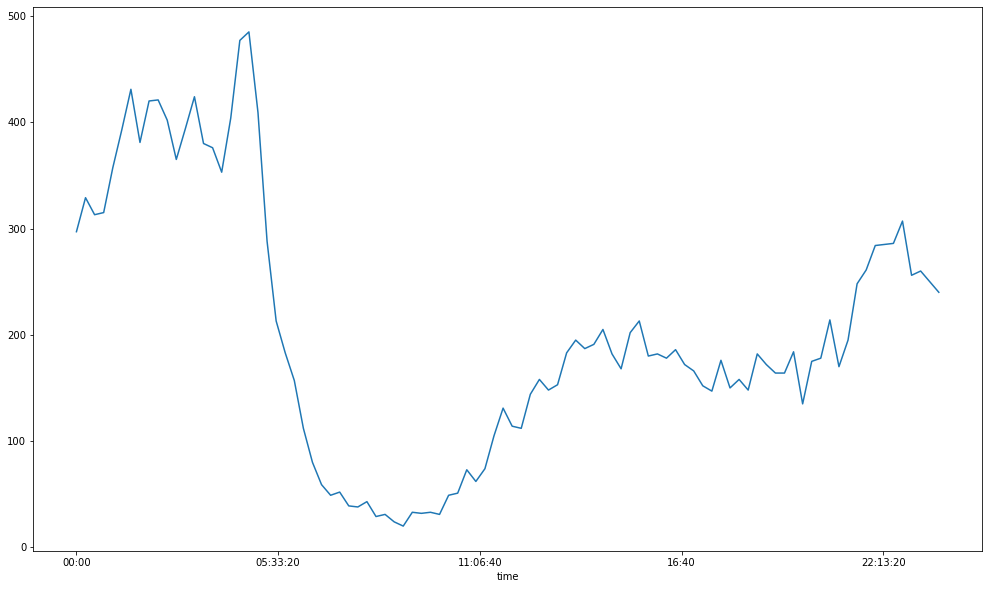

In [17]:
plt.figure(figsize=(17,10))

logins[logins['weekday_name']=='Saturday'].time_only.value_counts().plot(kind='line')

In [18]:
logins['date_only'].value_counts()

1970-04-04    1889
1970-03-14    1706
1970-03-07    1666
1970-03-15    1565
1970-03-29    1523
              ... 
1970-02-03     464
1970-01-26     462
1970-01-05     459
1970-04-13     395
1970-01-01     112
Name: date_only, Length: 103, dtype: int64

In [19]:
data['signup_date'] = pd.to_datetime(data['signup_date'], format='%Y-%m-%d') 
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'], format='%Y-%m-%d') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [20]:
data['retained'] = data.apply(lambda row: (row['last_trip_date'] - row['signup_date']).days, axis=1)

In [21]:
data['retained_indicator'] = np.where(data['retained'] > 30, 1, 0)
data['retained_6mo'] = np.where(data['retained'] > 149, 1, 0)

In [22]:
data['retained_6mo'].value_counts()

0    37286
1    12714
Name: retained_6mo, dtype: int64

In [23]:
data.retained.value_counts()

1      4374
0      2302
2      1063
155     756
154     687
       ... 
24      104
60      103
38       92
180      72
181      13
Name: retained, Length: 182, dtype: int64

In [24]:
data.last_trip_date.min()

Timestamp('2014-01-01 00:00:00')

<AxesSubplot:xlabel='surge_pct', ylabel='weekday_pct'>

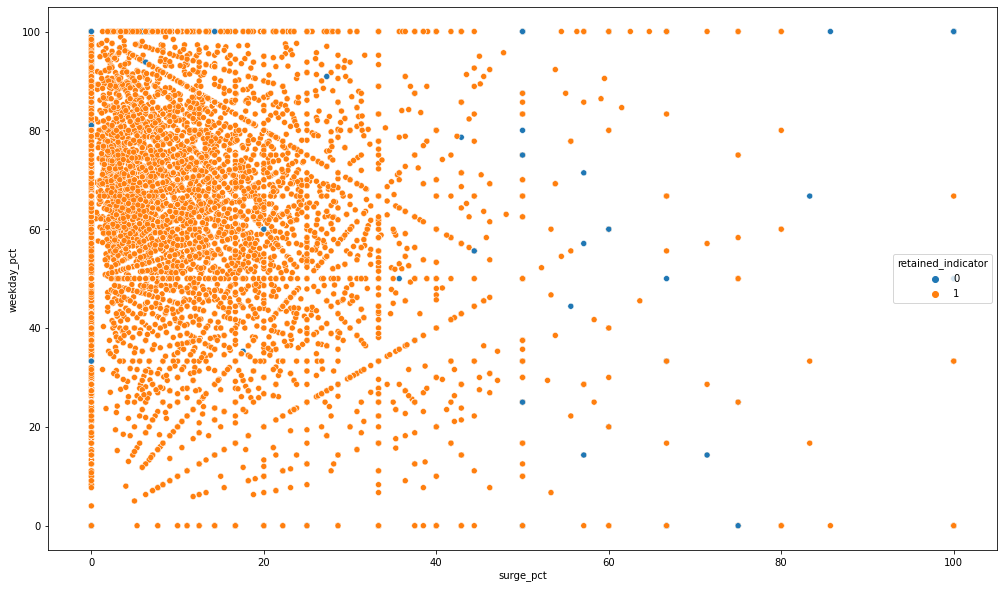

In [25]:
plt.figure(figsize=(17,10))
sns.scatterplot(x=data.surge_pct, y=data.weekday_pct, hue=data.retained_indicator)

In [26]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,retained_indicator,retained_6mo
0,Kings Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0,0
3,Kings Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Kings Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131,1,0
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1,0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111,1,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1,0,0


In [27]:
data = pd.get_dummies(data, prefix=['city','os', 'black_user',], columns=['city','phone', "ultimate_black_user",])
data = data.drop(['black_user_False', 'os_Android'], axis=1)
data = data.dropna()
X = data[['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 
       'retained_6mo', 'city_Astapor', 'city_Kings Landing',
       'city_Winterfell', 'os_iPhone', 'black_user_True']]
y = data['retained_indicator']



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [29]:
X['last_trip_date'] = X['last_trip_date'].map(datetime.datetime.toordinal)
X['signup_date'] = X['signup_date'].map(datetime.datetime.toordinal)

<ipython-input-29-6cc2c96c7c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['last_trip_date'] = X['last_trip_date'].map(datetime.datetime.toordinal)
<ipython-input-29-6cc2c96c7c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['signup_date'] = X['signup_date'].map(datetime.datetime.toordinal)


In [30]:
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(X,y,test_size=.25, random_state=8)

In [31]:
log_reg = LogisticRegression(penalty='elasticnet',solver='saga',max_iter=10000)

In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'l1_ratio': [0,.5,1]
             }

In [33]:
#lr_cv = GridSearchCV(log_reg, param_grid, cv=10, scoring='roc_auc')
#lr_cv.fit(X,y)
#lr_cv.best_estimator_

In [34]:
log_reg = LogisticRegression(C=0.001, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')
log_reg.fit(X_train_logit, y_train_logit)
y_pred_logit = log_reg.predict_proba(X_test_logit)[:,1]

In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
logit_fpr, logit_tpr, threshold = roc_curve(y_test_logit, y_pred_logit)
auc_logit = auc(logit_fpr, logit_tpr)
print(auc_logit)

1.0


In [37]:
log_reg.score(X_test_logit, y_test_logit)

0.770026830203143